
# MachineLearningCampProposal
This is a proposal project to attend Machine Learning Camp

I am going to reimplement and extend the paper "Hierarchical Question-Image Co-Attention for Visual Question Answering", appeared NIPS 2016. I got interested in this paper as well as attention based models after reimplementing the paper "Show, attend and tell: a neural image caption generation with visual attention" by Xu et al [5].
The details of the proposal implementation and extension will be illustrated in section 2 and section 3. 

## 2. Hierarchical Question-Image Co-Attention for Visual Question Answering

Recently, deep convolution neural networks (CNNs) and recurrent neural networks (RNNs) have shown promising results in many computer vision and natural language processing tasks such as image captioning, visual question answering, and machine translation. Visual Question Answering (VQA) has emerged as a challenge multi-discipline research problem because it requires both textual and visual information. Many research groups [2][3][4] have utilized CNNs net called VGG[6] and ResNet[7] to combine with a variant of RNNs called LSTM to tackle VQA. These networks learn to map the visual and textural features to a joint semantic space to correctly answer visual questions about an image. Recently, visual attention architectures [3][4] have shown a great potential to tackle many VQA datasets including COCO, VQA. The paper which I am going to reimplement and extend lies in attention based approach. 

The key contributions of the paper are listed as below:
### Co-Attention:
Previous works focus on visual attention, the model has a co-attention mechanism to attend both visual and textural information. In this paper, two co-attention mechanisms were proposed including parallel co-attention and alternating co-attention. 

The parallel co-attention computes the similarity between image and question features at all pairs of image regions and question location simultaneously. Given an image feature map $V = {{v_1},\dots,{v_N}}$ and question representation $Q = {{q_1}, \dots, {v_N}}$, the affinity matrix $C$ is calculated as follows:
  

$C = tanh(Q^T W V)$
 

Then, using the above affinity matrix to compute the attention weights with respect to visual features and textural features using softmax function
  
  $$H^v =tanh(W_v V + (W_q) Q C)$$  
  
  $$\alpha^v = softmax(U_v H^v)$$
  
  $$H^q =tanh(W_q Q + (W_v) Q C^T)$$  
  
  $$\alpha^q = softmax(U_q H^q)$$
  
  Then, attention vectors for visual and textural information are calculated as weighted sum of image features and textural features.
  
  $$\hat{v} = \sum_{n=1}^N v_n \alpha_n^v$$
  
  $$\hat{q} = \sum_{q=1}^T q_t \alpha_t^q$$
  
Similarly, alternating co-attention estimates the attention vectors as parallel mechanism but in a sequential order.

### Question Hierarchy:
The paper build a hierarchical architecture that co-attends image and question at three levels: word level, phrase level and question level. They utlized embedding matrix, 1-D convolutional neural networks and LSTM to represent questions in word level, phrase level and question level, respectively. 

### Encoding for predicting answers
The paper utilized multi-layer perceptrons (MLP) with inputs from above attented visual and textural features to recursively encode features to predict answer. 

   $$h^w = tanh (W_w (\hat{q}^w + \hat{v}^w))$$
     
   $$h^p = tanh (W_p [(\hat{q}^p + \hat{v}^p), h^w])$$
     
   $$h^s = tanh (W_s [(\hat{q}^s + \hat{v}^s), h^p])$$
     
   $$p = softmax (W_h h^s)$$
     
$p$ is the probability of the final answer

## 3. Extension
### Archicture Extension

The above paper have shown a high accuracy rate in VQA tasks multiple-choice and open-ended questions. However, in both types of questions, the answer is still single word or just classification task. 

My main propose is to replace the above architectures in the last layer of encoding for predicting answers with an two-layer LSTM to have a sentence answer. The two-layer LSTM will be fed with the above attention features vectors at different levels (word level, phrase level) as extra inputs. The outputs should be a sentence to answer open-ended questions. For example, a question raised by users "What is this scene?", the answer should be "It is a diner party" (sentence) instead of "party" or "people" or "dog" (single word). 

$i_t = f_i(x_{t-1}, h_{t-1}, \hat{v}, \hat{q})$

$f_t = f_f(x_{t-1}, h_{t-1}, \hat{v}, \hat{q})$

$o_t = f_o(x_{t-1}, h_{t-1}, \hat{v}, \hat{q})$

$g_t = f_g(x_{t-1}, h_{t-1}, \hat{v}, \hat{q})$

$h_t = o_t \bigodot tanh{c_t}$

$c_t = f_t \bigodot c_{t-1} + i_t \bigodot g_t$

where $f_i, f_f, f_o, f_g$ are non-linear functions of the inputs.

### Testing on new dataset

As of this proposed plan, the main datasets for VQA research communities are COCO-QA[8] and the VQA dataset [9] which provide open-ended and multiple choice questions. These datasets provide a huge amount of reference resources to train VQA systems which have practical applications, such as helping visually impared people see, quering image, and chat bot with visual information. In my proposal, I am going to re-implement, extend and verify the above algorithm with existing datasets. 

However, the abilities of these above systems are still limited as kids at young ages. To help machines go further in machine intelligence, they should have abilities to understand abstract definitions related to science such as reasoning about objects, relation and their physical properties. Recent work (reported in NIPS by Google Deepmind) [10, 11] has attempted to build NN models that can make predictions about stability, collision forces, velocities of objects from virtual interactive environments. Therefore, I am going to verify with a scientific demonstration dataset to build an intelligent educational assistant. The assistant helps users (s tudents from the elementary school to the high school) to understand about science phenomena from images through communicating in natural language.

For instance, the below images illustrate two physics phenomena that are "how a kite would fly?" and "the working mechanism of concave mirror"


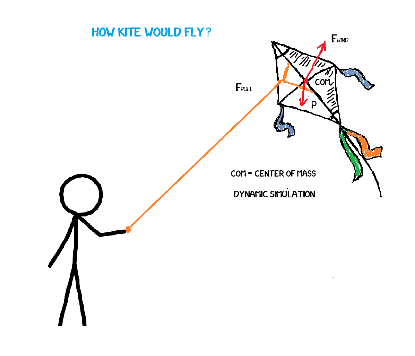

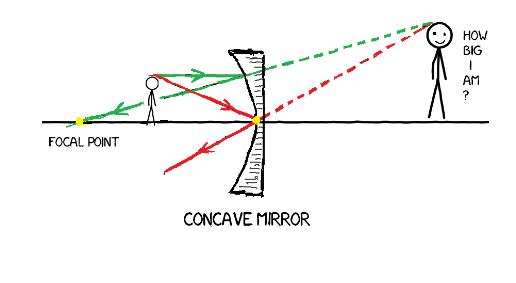

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

url = "kite.png"

plt.axis('off')
image = mpimg.imread(url)
plt.imshow(image)
plt.show()

plt.axis('off')
url = "concave.png"
image = mpimg.imread(url)
plt.imshow(image)
plt.show()

If we input the above images to the state-of-the-art VQA systems currently, these systems got troubles to answer scientific related questions including such as "how many forces acting on a kite?" or "What is optics and light?". The main reason is that these existing VQA systems are normally trained with daily life images not scientific related topics. Another reason is that the current VQA systems normally reason from visual information from images not abstract information such as how objects interact in complex sytem or physical or biological properties of objects such mass, forces and shapes. If we would utilize scientific illustrations such as images with captions and question answer pairs, gif files, video clips to train VQA system, we can help machine to understand abstract properties of objects in our life from physics, biology to chemistry.
    

## Reference

1. Jiasen Lu, Jianwei Yang, Dhruv Batra, Devi Parikh. Hierarchical Question-Image Co-Attention for Visual Question Answering. Neural Inforamtion Processing Systems (NIPS) 2016. 
2. Hyeonwoo Noh, Paul Hongsuck Seo, Bohyung Han. Image Question Answering using Convolutional Neural Network with Dynamic Parameter Prediction. IEEE Conference on Computer Vision and Pattern Recognition (CVPR), Las Vegas, NV, US, 2016
3. Z. Yang, X. He, J. Gao, L. Deng and A. Smola. "Stacked Attention Networks for Image Question Answering," 2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR), Las Vegas, NV, 2016, pp. 21-29.
4. Kevin J. Shih, Saurabh Singh, Derek Hoiem. Where To Look: Focus Regions for Visual Question Answering. CVPR, 2016
5. K. Xu, J. Ba, R. Kiros, K. Cho, A. Courville, R. Salakhutdinov, R. Zemel, Y. Bengio. "Show, Attend and Tell: Neural Image Caption Generation with Visual Attention". ICML 2015
6. K. Simonyan, A. Zisserman. Very Deep Convolutional Networks for Large-Scale Image Recognition. CPVR, 2014
7. Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun. Deep Residual Learning for Image Recognition. CPVR, 2016
8. Tsung-Yi Lin, Michael Maire, Serge Belongie, Lubomir Bourdev, Ross Girshick, James Hays, Pietro Perona, Deva Ramanan, C. Lawrence Zitnick, Piotr Dollár. Microsoft COCO: Common Objects in Context
9. Stanislaw Antol and Aishwarya Agrawal and Jiasen Lu and Margaret Mitchell and Dhruv Batra and C. Lawrence Zitnick and Devi Parikh. VQA: Visual Question Answering.ICCV. 2015.
10. Denil, M., Agrawal, P., Kulkarni, T. D., Erez, T., Battaglia, P., and de Freitas, N. (2016). Learning to perform physics experiments via deep reinforcement learning. In NIPS 2016 Deep Reinforcement Learning Workshop
11. P. Battaglia, R. Pascanu, M. Lai, D. Jimenez Rezende, and K. Koray. Interaction networks for learning about objects, relations and physics. In Advances in Neural Information Processing Systems, 2016